In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
from sklearn.decomposition import PCA
import scipy.io as sio
np.random.seed(7)
Data=sio.loadmat('/content/drive/MyDrive/datasets/PaviaU (1).mat')['paviaU']
Label=sio.loadmat('/content/drive/MyDrive/datasets/PaviaU_gt (12).mat')['paviaU_gt']
Data=np.reshape(Data,(Data.shape[0]*Data.shape[1],Data.shape[2]))

Label=np.reshape(Label,(Label.shape[0]*Label.shape[1]))

Labels,counts=np.unique(Label,return_counts=True)

Data=Data[Label>0,:]
Label=Label[Label>0]

Labels,counts=np.unique(Label,return_counts=True)


Labels,counts=np.unique(Label,return_counts=True)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Data)
Data= scaler.transform(Data)
from sklearn.model_selection import train_test_split

testRatio=0.20

X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=testRatio, random_state=345,
                                                        stratify=Label)
X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

30


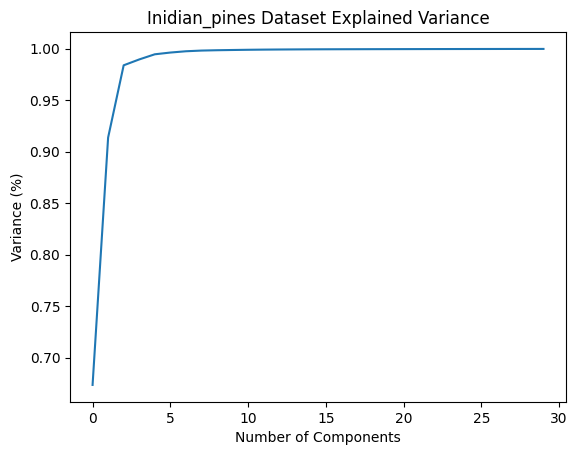

In [4]:
import matplotlib.pyplot as plt
pca = PCA(n_components=30)
pca.fit_transform(X_train)
newspace=pca.components_
newspace=newspace.transpose()
X_train=np.matmul(X_train,newspace)
print(pca.n_components_)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Inidian_pines Dataset Explained Variance')
plt.show()
X_test=np.matmul(X_test,newspace)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
# Predict on the test set
y_pred = knn.predict(X_test)

In [9]:
y_pred = knn.predict(X_test)

In [10]:
import pandas as pd
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
# print(confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred ))

Accuracy : 88.77980364656382
Cohen Kappa Score : 84.81004371354797
              precision    recall  f1-score   support

           1       0.93      0.89      0.91      1326
           2       0.88      0.99      0.93      3730
           3       0.71      0.76      0.73       420
           4       0.98      0.85      0.91       613
           5       0.99      0.99      0.99       269
           6       0.92      0.61      0.73      1006
           7       0.76      0.79      0.78       266
           8       0.83      0.84      0.83       737
           9       1.00      1.00      1.00       189

    accuracy                           0.89      8556
   macro avg       0.89      0.86      0.87      8556
weighted avg       0.89      0.89      0.88      8556

